#<center>**Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository**</center>

# I. Στοιχεία ομάδας 19

1.   Δαμιανός Παππάς, ΑΜ: 03116608
2.   Χαράλαμπος Ρωσσίδης, ΑΜ: 03116701
3.   Νεκτάριος Ματσάγκος, ΑΜ: 03116709

# II. Βασικές πληροφορίες

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle

### *1.Σύντομη παρουσίαση του dataset (τι περιγράφει).*

Παραθέτουμε την επίσημη περιγραφή που παρέχει το dataset:


-*The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected in patterns, allowing to discriminate statistically those caused by primary gammas from the images of hadronic showers initiated by cosmic rays in the upper atmosphere. Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.*

Τα δεδομένα δημιουργήθηκαν από ένα Monte Carlo πρόγραμμα, Corsika, και περιγράφεται από το D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

### *2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;*

In [ ]:

!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade
!pip install -U imbalanced-learn
!pip install --upgrade scipy 

In [ ]:
import pandas as pd
import numpy as np
datao = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data",header=None).to_numpy()
print("The Dataset contains",datao.shape[0],"samples,",datao.shape[1]-1,"features and a label.")

The Dataset contains 19020 samples, 10 features and a label.


In [ ]:

data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


-Προκύπτει ότι το Dataset αποτελείται από 19020 δείγματα, καθένα εκ των οποίων έχει 10 χαρακτηριστικά συν την binary ετικέτα του. Στη συνέχεια θα εξετάσουμε το είδος των χαρακτηριστικών μέσω του δείγματος μιας και το dataset δεν έχει απουσιάζουσες τιμές.

In [ ]:
print("Data types of features:",set([type(feature) for feature in datao[0]]))

Data types of features: {<class 'float'>, <class 'str'>}


In [ ]:
labels = data.iloc[:, 10]
print(data.dtypes)


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object


-
  Παρατηρούμε πως όλα τα χαρακτηριστικά λαμβάνουν αριθμητικές **float64** τιμές και η μόνη μη διατεταγμένη μορφή είναι η τελευταία στήλη που υποδηλώνει το label και είναι τύπου **str** (*object*).

### *3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;*

In [ ]:
print(data.values[0:5,:])

[[28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092
  81.8828 'g']
 [31.6036 11.7235 2.5185 0.5303 0.3773 26.2722 23.8238 -9.9574 6.3609
  205.261 'g']
 [162.05200000000002 136.031 4.0612 0.0374 0.0187 116.741 -64.858 -45.216
  76.96 256.788 'g']
 [23.8172 9.5728 2.3385 0.6147 0.3922 27.2107 -6.4633 -7.1513
  10.449000000000002 116.73700000000001 'g']
 [75.1362 30.9205 3.1611 0.3168 0.1832 -5.5277 28.5525 21.8393 4.648
  356.462 'g']]


In [ ]:
labels0 = datao[:,-1]
feats  = datao[:,:-1]
print("Labels of the Dataset:",set(labels))

Labels of the Dataset: {'h', 'g'}


In [ ]:
labels

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: 10, Length: 19020, dtype: object

-
 Τυπώνοντας τις πρώτες 5 γραμμές του αρχείου, παρατηρούμε ότι δεν υπάρχουν επικεφαλίδες ουτε αρίθμηση γραμμών.

### *4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολώνα βρίσκονται;* 

-
Οι ετικέτες των δειγμάτων βρίσκονται στην τελευταία στήλη, σύμφωνα με το documentation και λαμβάνουν τις τιμές g (gamma) ή h (hadron).
 

### *5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?*

-
Δεν υπάρχει αρίθμηση στηλών και γραμμών, τα δεδομένα και τα χαρακτηριστικά τους είναι στις σωστές θέσεις άρα δε χρειάζεται να κάνουμε μετατροπές στο αρχείο.

### *6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;* 

In [ ]:
features = data.iloc[:, 0:10]
features

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [ ]:
features.isnull().values.any()

False

In [ ]:
print("Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές:", 0/len(data)*100 , "%")

Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές: 0.0 %


-
Οχι δεν υπαρχουν απουσιαζουσες τιμες αυτο το ξερουμε και απο το documentation του dataset.



### *7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.*


In [ ]:
frequencies = pd.value_counts(labels)
print("Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:")
print(frequencies)

print("Ποσοστό 'gamma':", frequencies[0]/len(labels)*100, '%')
print("Ποσοστό 'hardon:", frequencies[1]/len(labels)*100, '%')


Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:
g    12332
h     6688
Name: 10, dtype: int64
Ποσοστό 'gamma': 64.83701366982125 %
Ποσοστό 'hardon: 35.16298633017876 %



-Είναι εμφανές πως τα δεδομένα κλίνουν κατά ένα βαθμό στην κλάση gamma, συνεπώς τα δεδομένα μας δεν είναι καλώς ισορροπημένα. Παρότι το ποσοστό παραμένει οριακά μικρότερο από 2/3 και και θα μπορούσαμε να μην κάνουμε κάτι επιπλέον, επιλέγουμε να εφαρμόσουμε oversampling, θεωρώντας ότι όσο πιο ισορροπημένο είναι το dataset, τόσο καλύτερα θα είναι τα αποτελέσματα. Για να γίνει αυτό θα προηγηθεί το split.

### *8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.*

-Σαν τελευταίο βήμα επεξεργασίας, θα χωρίσουμε τα δεδομένα σε train και test μέσω της αντίστοιχης συνάρτησης train_test_split() της Scikit-learn. Αντίστοιχα χωρίζουμε και τα labels. Επιλέγουμε σχήμα 30% για το test set

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.30,random_state=0)

-Ως τελευταίο βήμα, θα εφαρμόσουμε oversampling ούτως ώστε να εξισορροπήσουμε το dataset, όπως προείπαμε. Η έννοια του oversampling ειναι πρακτικά η επανάληψη samples από την υπολείπουσα κλάση, ώστε ο λόγος τους να τείνει προς το ιδανικό 50%. Θα εφαρμόσουμε για αυτό το σκοπό την συνάρτηση της Scikit-learn:

In [ ]:
ros = RandomOverSampler(random_state = 0)
features_train, labels_train = ros.fit_sample(features_train,labels_train)
balance = len(labels_train[labels_train=='g'])/len(labels_train)

print("The balance of the train set is",balance)

The balance of the train set is 0.5


# III. Baseline Classification

### *1.Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.*

Ορίζουμε μία συνάρτηση που εκπαιδεύει τους dummy classifiers με default τιμές και επιστρέφει σε dictionary τα predictions κάθε ταξινομητή, την ακρίβεια του καθώς και τους χρόνους fit και train

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

pred={}
micro={}
macro={}
weighted={}

dc_uniform = DummyClassifier(strategy="uniform")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

model=dc_uniform.fit(features_train, labels_train)
pred["uniform"]= dc_uniform.predict(features_test)
cnf_matrix = confusion_matrix(labels_test, pred["uniform"])
print("UNIFORM")
print(classification_report(labels_test, pred["uniform"]))
print(cnf_matrix,"\n")

avg=f1_score(labels_test,pred["uniform"], average='micro')
micro["uniform"]=avg
avg=f1_score(labels_test,pred["uniform"], average='macro')
macro["uniform"]=avg


model=dc_most_frequent.fit(features_train, labels_train)
pred["most_frequent"]= dc_most_frequent.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["most_frequent"])
print("MOST FREQUENT")
print(classification_report(labels_test, pred["most_frequent"]))
print(cnf_matrix,"\n")

avg=f1_score(labels_test,pred["most_frequent"], average='micro')
micro["most_frequent"]=avg
avg=f1_score(labels_test,pred["most_frequent"], average='macro')
macro["most_frequent"]=avg



model=dc_stratified.fit(features_train, labels_train)
pred["stratified"]= dc_stratified.predict(features_test)
cnf_matrix = confusion_matrix(labels_test, pred["stratified"])
print("STRATIFIED")
print(classification_report(labels_test, pred["stratified"]))
print(cnf_matrix)

avg=f1_score(labels_test,pred["stratified"], average='micro')
micro["stratified"]=avg
avg=f1_score(labels_test,pred["stratified"], average='macro')
macro["stratified"]=avg

UNIFORM
              precision    recall  f1-score   support

           g       0.64      0.50      0.56      3689
           h       0.35      0.49      0.41      2017

    accuracy                           0.50      5706
   macro avg       0.50      0.50      0.49      5706
weighted avg       0.54      0.50      0.51      5706

[[1843 1846]
 [1020  997]] 

MOST FREQUENT
              precision    recall  f1-score   support

           g       0.65      1.00      0.79      3689
           h       0.00      0.00      0.00      2017

    accuracy                           0.65      5706
   macro avg       0.32      0.50      0.39      5706
weighted avg       0.42      0.65      0.51      5706

[[3689    0]
 [2017    0]] 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


STRATIFIED
              precision    recall  f1-score   support

           g       0.66      0.51      0.58      3689
           h       0.36      0.51      0.42      2017

    accuracy                           0.51      5706
   macro avg       0.51      0.51      0.50      5706
weighted avg       0.55      0.51      0.52      5706

[[1892 1797]
 [ 992 1025]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(features_train, labels_train)
pred["gnb"] = gnb.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["gnb"])
print("GNB")
print(classification_report(labels_test, pred["gnb"]))
print(cnf_matrix,"\n")

avg=f1_score(labels_test,pred["gnb"], average='micro')
micro["gnb"]=avg
avg=f1_score(labels_test,pred["gnb"], average='macro')
macro["gnb"]=avg

GNB
              precision    recall  f1-score   support

           g       0.73      0.90      0.81      3689
           h       0.68      0.40      0.50      2017

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.71      0.72      0.70      5706

[[3317  372]
 [1214  803]] 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(features_train, labels_train)
pred["knn"] = knn.predict(features_test)
cnf_matrix = confusion_matrix(labels_test, pred["knn"])
print("KNN")
print(classification_report(labels_test, pred["knn"]))
print(cnf_matrix, "\n")

avg=f1_score(labels_test,pred["knn"], average='micro')
micro["knn"]=avg
avg=f1_score(labels_test,pred["knn"], average='macro')
macro["knn"]=avg

KNN
              precision    recall  f1-score   support

           g       0.83      0.84      0.84      3689
           h       0.70      0.69      0.70      2017

    accuracy                           0.79      5706
   macro avg       0.77      0.77      0.77      5706
weighted avg       0.79      0.79      0.79      5706

[[3103  586]
 [ 621 1396]] 



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
mlp = MLPClassifier()
mlp.fit(features_train,labels_train)
pred['mlp'] = mlp.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["mlp"])

print("MLP")
print(classification_report(labels_test, pred["mlp"]))
print(cnf_matrix, "\n")

avg=f1_score(labels_test,pred["mlp"], average='micro')
micro["mlp"]=avg
avg=f1_score(labels_test,pred["mlp"], average='macro')
macro["mlp"]=avg

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP
              precision    recall  f1-score   support

           g       0.88      0.86      0.87      3689
           h       0.75      0.79      0.77      2017

    accuracy                           0.83      5706
   macro avg       0.81      0.82      0.82      5706
weighted avg       0.83      0.83      0.83      5706

[[3159  530]
 [ 430 1587]] 



In [ ]:
from sklearn.svm import SVC 
svmpoly = SVC(class_weight='balanced',kernel='poly')
svmpoly.fit(features_train, labels_train)
pred["svmpoly"] = svmpoly.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["svmpoly"])

print("SVMpoly")
print(classification_report(labels_test, pred["svmpoly"]))
print(cnf_matrix, "\n")

avg=f1_score(labels_test,pred["svmpoly"], average='micro')
micro["svmpoly"]=avg
avg=f1_score(labels_test,pred["svmpoly"], average='macro')
macro["svmpoly"]=avg



SVMpoly
              precision    recall  f1-score   support

           g       0.83      0.90      0.86      3689
           h       0.78      0.66      0.72      2017

    accuracy                           0.81      5706
   macro avg       0.80      0.78      0.79      5706
weighted avg       0.81      0.81      0.81      5706

[[3309  380]
 [ 677 1340]] 



In [ ]:
from sklearn.svm import LinearSVC 
svmlinear = LinearSVC(class_weight='balanced', max_iter=90000)
svmlinear.fit(features_train, labels_train)
pred["svmlinear"] = svmlinear.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["svmlinear"])

print("SVMlinear")
print(classification_report(labels_test, pred["svmlinear"]))
print(cnf_matrix, "\n")

avg=f1_score(labels_test,pred["svmlinear"], average='micro')
micro["svmlinear"]=avg
avg=f1_score(labels_test,pred["svmlinear"], average='macro')
macro["svmlinear"]=avg

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVMlinear
              precision    recall  f1-score   support

           g       0.77      0.91      0.83      3689
           h       0.74      0.50      0.60      2017

    accuracy                           0.76      5706
   macro avg       0.76      0.70      0.71      5706
weighted avg       0.76      0.76      0.75      5706

[[3345  344]
 [1016 1001]] 



In [ ]:
from sklearn.svm import SVC 
svmrbf = SVC(class_weight='balanced',kernel='rbf')
svmrbf.fit(features_train, labels_train)
pred["svmrbf"] = svmrbf.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["svmrbf"])
print("SVMrbf")
print(classification_report(labels_test, pred["svmrbf"]))
print(cnf_matrix, "\n")

avg=f1_score(labels_test,pred["svmrbf"], average='micro')
micro["svmrbf"]=avg
avg=f1_score(labels_test,pred["svmrbf"], average='macro')
macro["svmrbf"]=avg

SVMrbf
              precision    recall  f1-score   support

           g       0.85      0.87      0.86      3689
           h       0.76      0.72      0.74      2017

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.82      0.82      5706

[[3224  465]
 [ 561 1456]] 



### *2.Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*

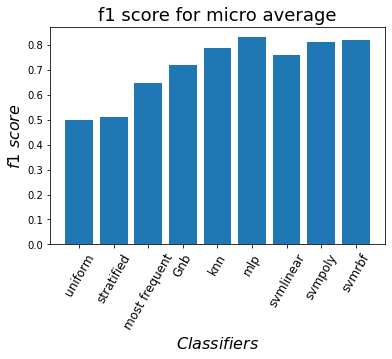

In [ ]:
import matplotlib.pyplot as plt

data = {'uniform': micro['uniform'], 'stratified': micro['stratified'], 'most frequent': micro['most_frequent'],'Gnb': micro['gnb'],'knn': micro['knn'],'mlp':micro['mlp'],'svmlinear':micro['svmlinear'], 'svmpoly':micro['svmpoly'],'svmrbf':micro['svmrbf']}
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.xticks(rotation = 60, fontsize = 12)
plt.show()

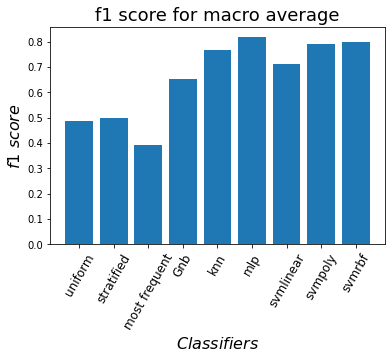

In [ ]:
import matplotlib.pyplot as plt

data = {'uniform': macro['uniform'], 'stratified': macro['stratified'], 'most frequent': macro['most_frequent'],'Gnb': macro['gnb'],'knn': macro['knn'],'mlp':macro['mlp'],'svmlinear':macro['svmlinear'], 'svmpoly':macro['svmpoly'],'svmrbf':macro['svmrbf']}
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.xticks(rotation = 60, fontsize = 12)
plt.show()


### *3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.*

In [ ]:
print("The balance of the test set is",round(100*len(labels_test[labels_test=='g'])/len(labels_test),3),"in favor of class 'g'.")


The balance of the test set is 64.651 in favor of class 'g'.


*  Μεταξύ των dummy ταξινομητών, η καλύτερη στρατηγική είναι να διαλέγουμε πάντοτε την πιο συχνή κλάση (frequent) μιας και το test set δεν είναι ισορροπημένο, όπως φαίνεται παραπάνω.
*  Εαν δοκιμάσουμε πολλά runs, θα παρατηρήσουμε ότι η επιλογή stratified, δηλαδή να επιλέγουμε τυχαία κλάση διατηρώντας την κατανομή των κλάσεων στο training set, ενώ στη γενική περίπτωση δίνει καλύτερα αποτελέσματα από τη random επιλογή, στη προκειμένη, λόγω της ισορροπίας του train dataset, οι δύο μέθοδοι είναι ισοδύναμες.
*  Ο k-NN ταξινομητής δίνει καλύτερο αποτέλεσμα από τους dummy classifiers, αφού βασίζεται σε έναν αλγόριθμο λογικής ανάλυσης των δεδομένων. Επιπλέον λόγω του εκτενούς μεγέθους του test dataset, το αποτέλεσμα του ταξινομητή είναι ικανοποιητικό.
*  Ο Naive Bayes εμφανίζει επίσης βελτιωμένα αποτελέσματα συγκριτικά με τους dummy ταξινομητές, αλλά όχι καλύτερα από τον kNN. Αυτό οφείλεται στις "αφελείς" παραδοχές του συγκεκριμένου ταξινομήτη, όπως το ότι υποθέτει κανονική κατανομή των features και ανεξαρτησία μεταξύ τους.
*  O MLP εμφανίζει την ψηλοτερη επίδοση από τους non-Dummy ταξινομητές. Ο συγκεκριμένος ταξινομητής λαμβάνει πληθώρα παραμέτρων, η βελτιστοποίηση των οποίων θα οδηγήσει σε πιο ικανοποιητικό αποτέλεσμα. Επομένως, λόγω της επιλογής απλοϊκού συνδυασμού παραμέτρων, το ποσοστό είναι καλο και παραμένει υψηλότερο από τους Dummy ταξινομητές.
*  O SVM εμφανιζει για ολους τους πυρηνες του χαμηλοτερη αποδοση απο τον Mlp, αλλα οι πυρηνες rbf και poly εμφανιζουν υψηλοτερη αποδοση απο ολους τους υπολοιπους ταξινομητες και για micro και για macro. Τελος ο SVM για τον πυρηνα που ακολουθει αρχιτεκτονικη linear εμφανιζει την χαμηλοτερη αποδοση απο τους 3.(rbf,poly,linear ειναι η σειρα αποδοσης για τον SVM) 


  



# IV. Βελτιστοποιηση Ταξινομητων

### *1. Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.*


-
Σε αυτό το μέρος θα βελτιστοποιήσουμε τους ταξινομητές **knn**, **gaussian naive bayes** , **svc** και **mlp** που περιγράφηκαν παραπάνω. Αυτο θα το επιτύχουμε βρίσκοντας τα στάδια προεπεξεργασίας (με τη χρήση pipelines) και τις υπερπαραμέτρους (με τη χρήση grid-search) για τον καθένα ξεχωριστά ώστε να πετυχαίνουν όσο το δυνατόν υψηλότερη απόδοση.

In [ ]:
!pip install --upgrade imbalanced-learn

In [ ]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC


# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
#KNN Classifier
clf = neighbors.KNeighborsClassifier()
#MLP Classifier
mlp = MLPClassifier()
#Gaussian NB Classifier
gnb = GaussianNB()
#SVC Classifier για πυρήνες poly και rbf 
svmpoly = SVC(class_weight='balanced',kernel='poly')
svmrbf=SVC(class_weight='balanced', kernel='rbf')
#SVC Classifier για linear πυρηνα 
svmlinear=LinearSVC(class_weight='balanced')



#Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

# KNN Clasifier
#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('kNN', clf)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', clf)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe8 = Pipeline(steps=[('sampler', ros), ('kNN', clf)])
pipe9 = Pipeline(steps=[('pca', pca), ('kNN', clf)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

pipe1 
               precision    recall  f1-score   support

           g       0.85      0.86      0.86      3689
           h       0.74      0.73      0.74      2017

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.81      0.82      0.81      5706

pipe2 
               precision    recall  f1-score   support

           g       0.83      0.83      0.83      3689
           h       0.69      0.70      0.69      2017

    accuracy                           0.78      5706
   macro avg       0.76      0.76      0.76      5706
weighted avg       0.78      0.78      0.78      5706

pipe3 
               precision    recall  f1-score   support

           g       0.83      0.83      0.83      3689
           h       0.69      0.70      0.69      2017

    accuracy                           0.78      5706
   macro avg       0.76      0.76      0.76      5706
weighted avg       0.78      0.78      0.78      5

In [ ]:
# MLP Classifier
#MLP Classifier
mlp = MLPClassifier()
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('mlp', mlp)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('mlp', mlp)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('mlp', mlp)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe8 = Pipeline(steps=[('sampler', ros), ('mlp', mlp)])
pipe9 = Pipeline(steps=[('pca', pca), ('mlp', mlp)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe1 
               precision    recall  f1-score   support

           g       0.90      0.90      0.90      3689
           h       0.82      0.82      0.82      2017

    accuracy                           0.87      5706
   macro avg       0.86      0.86      0.86      5706
weighted avg       0.87      0.87      0.87      5706

pipe2 
               precision    recall  f1-score   support

           g       0.82      0.96      0.88      3689
           h       0.88      0.61      0.72      2017

    accuracy                           0.83      5706
   macro avg       0.85      0.78      0.80      5706
weighted avg       0.84      0.83      0.83      5706



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe3 
               precision    recall  f1-score   support

           g       0.86      0.91      0.89      3689
           h       0.82      0.74      0.78      2017

    accuracy                           0.85      5706
   macro avg       0.84      0.82      0.83      5706
weighted avg       0.85      0.85      0.85      5706



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe4 
               precision    recall  f1-score   support

           g       0.89      0.92      0.90      3689
           h       0.84      0.79      0.81      2017

    accuracy                           0.87      5706
   macro avg       0.86      0.85      0.86      5706
weighted avg       0.87      0.87      0.87      5706



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe5 
               precision    recall  f1-score   support

           g       0.90      0.89      0.90      3689
           h       0.80      0.83      0.81      2017

    accuracy                           0.87      5706
   macro avg       0.85      0.86      0.86      5706
weighted avg       0.87      0.87      0.87      5706

pipe6 
               precision    recall  f1-score   support

           g       0.87      0.92      0.89      3689
           h       0.84      0.75      0.79      2017

    accuracy                           0.86      5706
   macro avg       0.85      0.83      0.84      5706
weighted avg       0.86      0.86      0.86      5706

pipe7 
               precision    recall  f1-score   support

           g       0.87      0.91      0.89      3689
           h       0.82      0.74      0.78      2017

    accuracy                           0.85      5706
   macro avg       0.84      0.83      0.83      5706
weighted avg       0.85      0.85      0.85      5

In [ ]:
# GNB Classifier
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', gnb)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('gnb', gnb)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('gnb', gnb)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('gnb', gnb)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe8 = Pipeline(steps=[('sampler', ros), ('gnb', gnb)])
pipe9 = Pipeline(steps=[('pca', pca), ('gnb', gnb)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

pipe1 
               precision    recall  f1-score   support

           g       0.77      0.86      0.81      3689
           h       0.67      0.53      0.59      2017

    accuracy                           0.74      5706
   macro avg       0.72      0.69      0.70      5706
weighted avg       0.74      0.74      0.73      5706

pipe2 
               precision    recall  f1-score   support

           g       0.73      0.90      0.81      3689
           h       0.68      0.40      0.50      2017

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.71      0.72      0.70      5706

pipe3 
               precision    recall  f1-score   support

           g       0.73      0.90      0.81      3689
           h       0.68      0.40      0.50      2017

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.71      0.72      0.70      5

In [ ]:
# SVM Classifier για πυρηνα poly
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
svmpoly = SVC(class_weight='balanced',kernel='poly')
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmpoly', svmpoly)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svmpoly', svmpoly)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('svmpoly', svmpoly)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('svmpoly', svmpoly)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('svmpoly', svmpoly)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmpoly', svmpoly)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('svmpoly', svmpoly)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('svmpoly', svmpoly)])
pipe8 = Pipeline(steps=[('sampler', ros), ('svmpoly', svmpoly)])
pipe9 = Pipeline(steps=[('pca', pca), ('svmpoly', svmpoly)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

pipe1 
               precision    recall  f1-score   support

           g       0.85      0.89      0.87      3689
           h       0.78      0.72      0.75      2017

    accuracy                           0.83      5706
   macro avg       0.82      0.81      0.81      5706
weighted avg       0.83      0.83      0.83      5706

pipe2 
               precision    recall  f1-score   support

           g       0.83      0.90      0.86      3689
           h       0.78      0.66      0.72      2017

    accuracy                           0.81      5706
   macro avg       0.80      0.78      0.79      5706
weighted avg       0.81      0.81      0.81      5706

pipe3 
               precision    recall  f1-score   support

           g       0.83      0.90      0.86      3689
           h       0.78      0.66      0.72      2017

    accuracy                           0.81      5706
   macro avg       0.80      0.78      0.79      5706
weighted avg       0.81      0.81      0.81      5

In [ ]:
# SVM Classifier για πυρηνα rbf
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
svmrbf=SVC(class_weight='balanced', kernel='rbf')
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmrbf', svmrbf)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svmrbf', svmrbf)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('svmrbf', svmrbf)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('svmrbf', svmrbf)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('svmrbf', svmrbf)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmrbf', svmrbf)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('svmrbf', svmrbf)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('svmrbf', svmrbf)])
pipe8 = Pipeline(steps=[('sampler', ros), ('svmrbf', svmrbf)])
pipe9 = Pipeline(steps=[('pca', pca), ('svmrbf', svmrbf)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

pipe1 
               precision    recall  f1-score   support

           g       0.89      0.90      0.90      3689
           h       0.82      0.80      0.81      2017

    accuracy                           0.87      5706
   macro avg       0.86      0.85      0.85      5706
weighted avg       0.87      0.87      0.87      5706

pipe2 
               precision    recall  f1-score   support

           g       0.85      0.87      0.86      3689
           h       0.76      0.72      0.74      2017

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.82      0.82      5706

pipe3 
               precision    recall  f1-score   support

           g       0.85      0.87      0.86      3689
           h       0.76      0.72      0.74      2017

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.82      0.82      5

In [ ]:
# SVM Classifier για πυρηνα linear
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
svmlinear=LinearSVC(class_weight='balanced', max_iter=20000)
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmlinear', svmlinear)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svmlinear', svmlinear)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('svmlinear', svmlinear)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('svmlinear', svmlinear)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('svmlinear', svmlinear)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('svmlinear', svmlinear)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('svmlinear', svmlinear)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('svmlinear', svmlinear)])
pipe8 = Pipeline(steps=[('sampler', ros), ('svmlinear', svmlinear)])
pipe9 = Pipeline(steps=[('pca', pca), ('svmlinear', svmlinear)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(features_train, labels_train)
  preds = pipe.predict(features_test)
  print(pipe_name, "\n", classification_report(labels_test, preds))

pipe1 
               precision    recall  f1-score   support

           g       0.84      0.84      0.84      3689
           h       0.70      0.71      0.71      2017

    accuracy                           0.79      5706
   macro avg       0.77      0.78      0.77      5706
weighted avg       0.79      0.79      0.79      5706



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe2 
               precision    recall  f1-score   support

           g       0.79      0.87      0.83      3689
           h       0.70      0.57      0.63      2017

    accuracy                           0.76      5706
   macro avg       0.75      0.72      0.73      5706
weighted avg       0.76      0.76      0.76      5706



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe3 
               precision    recall  f1-score   support

           g       0.83      0.76      0.79      3689
           h       0.61      0.71      0.66      2017

    accuracy                           0.74      5706
   macro avg       0.72      0.73      0.72      5706
weighted avg       0.75      0.74      0.74      5706

pipe4 
               precision    recall  f1-score   support

           g       0.84      0.84      0.84      3689
           h       0.70      0.71      0.71      2017

    accuracy                           0.79      5706
   macro avg       0.77      0.78      0.77      5706
weighted avg       0.79      0.79      0.79      5706

pipe5 
               precision    recall  f1-score   support

           g       0.84      0.84      0.84      3689
           h       0.70      0.71      0.71      2017

    accuracy                           0.79      5706
   macro avg       0.77      0.78      0.77      5706
weighted avg       0.79      0.79      0.79      5

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe6 
               precision    recall  f1-score   support

           g       0.83      0.78      0.80      3689
           h       0.64      0.71      0.67      2017

    accuracy                           0.75      5706
   macro avg       0.73      0.74      0.74      5706
weighted avg       0.76      0.75      0.76      5706



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe7 
               precision    recall  f1-score   support

           g       0.83      0.77      0.80      3689
           h       0.63      0.71      0.67      2017

    accuracy                           0.75      5706
   macro avg       0.73      0.74      0.73      5706
weighted avg       0.76      0.75      0.75      5706



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe8 
               precision    recall  f1-score   support

           g       0.75      0.93      0.83      3689
           h       0.78      0.44      0.57      2017

    accuracy                           0.76      5706
   macro avg       0.77      0.69      0.70      5706
weighted avg       0.76      0.76      0.74      5706



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


pipe9 
               precision    recall  f1-score   support

           g       0.83      0.80      0.82      3689
           h       0.66      0.71      0.69      2017

    accuracy                           0.77      5706
   macro avg       0.75      0.76      0.75      5706
weighted avg       0.77      0.77      0.77      5706



In [ ]:
#Υπολογίζουμε τη διακύμανση του train set για να δούμε τι τιμές να βάλουμε στο vthreshold 
import numpy as np
train_var = features_train.var(axis=0)
print(features_train.shape)
print(features_test.shape)
print(train_var)
print("max variance: ", np.max(train_var))
print("min variance: ", np.min(train_var))

(17286, 10)
(5706, 10)
0    2302.281305
1     449.599999
2       0.228471
3       0.034734
4       0.012895
5    4334.906340
6    3273.326321
7     539.958345
8     729.824466
9    5859.276170
dtype: float64
max variance:  5859.2761702476255
min variance:  0.012895285803996029


Επειδή έχουμε πολλες παραμέτρους στους classifiers και το grid search θα είναι χρονοβόρο, δοκιμάσαμε να προσεγγίσουμε τις βέλτιστες τιμές σε πολλα τρεξιματα με διαφορετικους συνδιασμους καθε φορα. Εδω παραθέτουμε τις καλυτερες τιμες που ειχαμε βγαλει απο την εντολη best_params_ αφού έχουμε προσδιορίσει τις διακριτές τιμές,σαν σχολιο θα μπαινουν οι παραμετροι που δοκιμασαμε και αποκλεισαμε. Τα υπόλοιπα τρεξίματα παραλείπονται καθώς και μόνο η επανεκτέλεση προκειμένου να ολοκληρωθεί το notebook μπορεί να τρέχει υπερβολικά πολλές ώρες.

In [ ]:
from sklearn.model_selection import GridSearchCV
vthreshold = [0.01] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components_knn = np.arange(9,11)
n_components_mlp = np.arange(8,11)
n_components_svm =  np.arange(9,11)

#KNN Classifier
k = np.arange(3,9) # η υπερπαράμετρος του ταξινομητή
weights = ['distance'] #'uniform','distance'
metric = ['manhattan'] #'euclidean','manhattan','chebyshev'

#MLP Classifier
hidden_layer_sizes = [(i,2) for i in range(8,256,64)]
activation = ['logistic'] # ['logistic','identity','tanh','relu']
solver = ['lbfgs']# ['lbfgs', 'sgd', 'adam']
alpha = np.geomspace(1e-8,1e-3,5)
learning_rate = ['constant']# ['constant', 'invscaling', 'adaptive']
max_iter = [950]#(250,300,400,500)

#GNB Classifier δεν θα βελτιστοποιήσουμε παραμέτρους

#SVM Classifier για πυρηνες poly και rdf
C=[500]#(1,5,10,50,100,250,500)
degree=[4] #(για πυρήνα poly)
gamma=['scale']#("auto")
tol=[1e-2] #(1e-3,1e-4,1e-5)

#SVM Classifier για πυρηνα linear
loss=['squared_hinge']
tolline=[1e-2] 
Cline=[250]





In [ ]:

#MLP
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)]) #without selector
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_mlp = GridSearchCV(pipe5, dict(pca__n_components=n_components_mlp, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__learning_rate=learning_rate, mlp__alpha=alpha, mlp__max_iter=max_iter), cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_mlp = GridSearchCV(pipe5, dict(pca__n_components=n_components_mlp, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__learning_rate=learning_rate, mlp__alpha=alpha, mlp__max_iter=max_iter), cv=5, scoring='f1_macro', n_jobs=-1,verbose = 10)

#KNN
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca),('kNN', clf)], memory = 'tmp')
#pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', clf)], memory = 'tmp') #without pca
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
#pipe9 = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator_micro_knn = GridSearchCV(pipe4, dict(pca__n_components=n_components_knn, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_knn = GridSearchCV(pipe4, dict(pca__n_components=n_components_knn, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1,verbose = 10)

#GNB
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)], memory = 'tmp')
#pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_gnb = GridSearchCV(pipe1, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_gnb = GridSearchCV(pipe1, dict(selector__threshold=vthreshold), cv=5, scoring='f1_macro', n_jobs=-1,verbose = 10)

#SVM linear
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca), ('svmlinear', svmlinear)],memory = 'tmp') 
#pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca), ('svmlinear', svmlinear)],memory = 'tmp') 
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμέςl
estimator_micro_svmlinear = GridSearchCV(pipe4, dict(  pca__n_components=n_components_svm, svmlinear__loss= loss, svmlinear__tol=[1e-2], svmlinear__C=[250]), cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_svmlinear = GridSearchCV(pipe4, dict(  pca__n_components=n_components_svm, svmlinear__loss= loss, svmlinear__tol=[1e-2], svmlinear__C=[250]), cv=5, scoring='f1_macro', n_jobs=-1,verbose = 10)

#SVM poly
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca), ('svmpoly', svmpoly)],memory = 'tmp')
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_svmpoly = GridSearchCV(pipe4, dict( pca__n_components=n_components_svm, svmpoly__C=C, svmpoly__degree=degree, svmpoly__gamma=gamma, svmpoly__tol=tol),  cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_svmpoly = GridSearchCV(pipe4, dict( pca__n_components=n_components_svm, svmpoly__C=C, svmpoly__degree=degree, svmpoly__gamma=gamma, svmpoly__tol=tol),  cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)

#SVM rbf
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca), ('svmrbf', svmrbf)],memory = 'tmp')
# το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_svmrbf = GridSearchCV(pipe4, dict( pca__n_components=n_components_svm, svmrbf__C=C, svmrbf__gamma=gamma, svmrbf__tol=tol  ),  cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)
estimator_macro_svmrbf = GridSearchCV(pipe4, dict( pca__n_components=n_components_svm, svmrbf__C=C, svmrbf__gamma=gamma, svmrbf__tol=tol  ),  cv=5, scoring='f1_micro', n_jobs=-1,verbose = 10)


#Αποθηκεύουμε όλα τα αποτελέσματα σε πίνακες για να απαντήσουμε στα επόμενα ερωτήματα 
estimators_micro = []
estimators_macro = []

estimators_micro.append(estimator_micro_knn)
estimators_micro.append(estimator_micro_gnb)
estimators_micro.append(estimator_micro_mlp)
estimators_micro.append(estimator_micro_svmpoly)
estimators_micro.append(estimator_micro_svmrbf)
estimators_micro.append(estimator_micro_svmlinear)


estimators_macro.append(estimator_macro_knn)
estimators_macro.append(estimator_macro_gnb)
estimators_macro.append(estimator_macro_mlp)
estimators_macro.append(estimator_macro_svmpoly)
estimators_macro.append(estimator_macro_svmrbf)
estimators_macro.append(estimator_macro_svmlinear)









In [ ]:
#estimator_micro_svmlinear.get_params().keys()



### *2.Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.*

In [ ]:

import time
train_time_macro =[]
test_time_macro = []
train_time_micro =[]

test_time_micro = []
f1_micro_scores = []
f1_macro_scores = []
micro_scores = []
macro_scores = []
cnf_matrix_macro = []
cnf_matrix_micro = []

for i in estimators_micro:    
    # micro
    start_time = time.time()
    i.fit(features_train, labels_train) 

    train_time_micro.append(time.time() - start_time)
    start_time = time.time()
    preds_micro = i.predict(features_test)
    test_time_micro.append(time.time() - start_time)
    micro_scores.append(precision_recall_fscore_support(labels_test, preds_micro, average='micro'))
    f1_micro_scores.append(precision_recall_fscore_support(labels_test , preds_micro, average='micro')[2])
    cnf_matrix_micro.append(confusion_matrix(labels_test, preds_micro))

for i in estimators_macro:
    # macro

    start_time = time.time()
    i.fit(features_train,labels_train)
    train_time_macro.append(time.time() - start_time)
    start_time = time.time()
    preds_macro = i.predict(features_test)
    test_time_macro.append(time.time() - start_time)
    macro_scores.append(precision_recall_fscore_support(labels_test, preds_macro, average='macro'))
    f1_macro_scores.append(precision_recall_fscore_support(labels_test, preds_macro, average='macro')[2])
    cnf_matrix_macro.append(confusion_matrix(labels_test, preds_macro))

time_micro = []
time_macro = []
time_micro.append(train_time_micro)
time_micro.append(test_time_micro)
time_macro.append(train_time_macro)
time_macro.append(test_time_macro)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   31.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 96.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 12.6min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   31.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 51.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 61.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 78.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 94.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 99

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 12.7min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print("Χρόνοι για fit στο train και predict στο test set, με average = micro")
pd.DataFrame(time_micro, index=["train fit", "test predict"], columns = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"])

Χρόνοι για fit στο train και predict στο test set, με average = micro


,KNN,GNB,MLP,SVMpoly,SVMrbf,SVMLinear
train fit,32.328655,2.853840,14560.601978,895.374902,270.097438,222.263099
test predict,0.767397,0.005093,0.061887,0.679131,1.153052,0.004950


In [ ]:
print("Χρόνοι για fit στο train και predict στο test set, με average = macro")
pd.DataFrame(time_macro, index=["train fit", "test predict"], columns = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"])

Χρόνοι για fit στο train και predict στο test set, με average = macro


,KNN,GNB,MLP,SVMpoly,SVMrbf,SVMLinear
train fit,32.101623,1.627267,14122.817730,907.327934,282.129952,269.127513
test predict,0.801026,0.006868,0.051513,0.710624,1.167049,0.006724


In [ ]:
print("Macro MLP")
print(estimator_macro_mlp.best_estimator_)
print(estimator_macro_mlp.best_params_)

print("Micro MLP")
print(estimator_micro_mlp.best_estimator_)
print(estimator_micro_mlp.best_params_)

print("Macro SVMLinear")
print(estimator_macro_svmlinear.best_estimator_)
print(estimator_macro_svmlinear.best_params_)

print("Micro SVMLinear")
print(estimator_micro_svmlinear.best_estimator_)
print(estimator_micro_svmlinear.best_params_)

print("Macro SVMPoly")
print(estimator_macro_svmpoly.best_estimator_)
print(estimator_macro_svmpoly.best_params_)

print("Macro SVMPoly")
print(estimator_macro_svmpoly.best_estimator_)
print(estimator_macro_svmpoly.best_params_)

print("Micro SVMPoly")
print(estimator_micro_svmpoly.best_estimator_)
print(estimator_micro_svmpoly.best_params_)

print("Macro SVMRbf")
print(estimator_macro_svmrbf.best_estimator_)
print(estimator_macro_svmrbf.best_params_)

print("Micro SVMRbf")
print(estimator_micro_svmrbf.best_estimator_)
print(estimator_micro_svmrbf.best_params_)

print("Macro KNN")
print(estimator_macro_knn.best_estimator_)
print(estimator_macro_knn.best_params_)

print("Micro KNN")
print(estimator_micro_knn.best_estimator_)
print(estimator_micro_knn.best_params_)

Macro MLP
Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=10)),
                ('mlp',
                 MLPClassifier(activation='logistic',
                               alpha=1.7782794100389227e-07,
                               hidden_layer_sizes=(200, 2), max_iter=950,
                               solver='lbfgs'))])
{'mlp__activation': 'logistic', 'mlp__alpha': 1.7782794100389227e-07, 'mlp__hidden_layer_sizes': (200, 2), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 950, 'mlp__solver': 'lbfgs', 'pca__n_components': 10}
Micro MLP
Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=10)),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0.001,
                               hidden_layer_sizes=(200, 2), max_iter=950,
                               solver='lbfgs'))])
{'mlp__activation': 'logistic', 'mlp

## *3.Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*


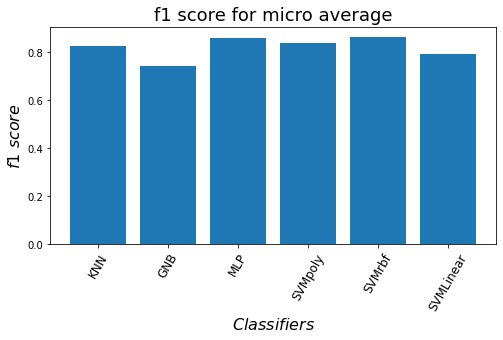

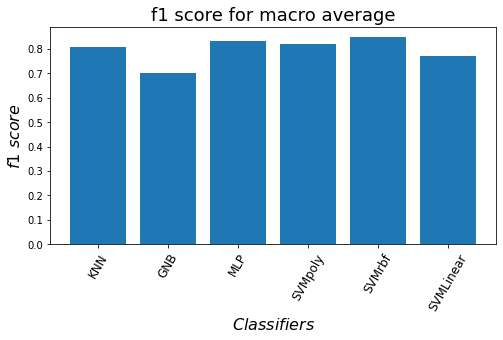

In [ ]:
import matplotlib.pyplot as plt

# classifiers = list(spam_pred.keys())

classifiers = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"]
y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

#micro_avg_f1[-1] = f1_micro[2]
plt.bar(y, f1_micro_scores, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

#macro_avg_f1[-1] = f1_macro[2]
plt.bar(y, f1_macro_scores, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

## *4.Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.*


In [ ]:
print("Μεταβολή επίδοσης για f1 micro")
micro_avg_f1=[]
micro_avg_f1=  micro['knn'], micro['gnb'], micro['mlp'],micro['svmpoly'], micro['svmrbf'], micro['svmlinear']
f1_progress_micro = [micro_avg_f1, f1_micro_scores]
pd.DataFrame(f1_progress_micro, index=["before", "after"], columns = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"])



Μεταβολή επίδοσης για f1 micro


,KNN,GNB,MLP,SVMpoly,SVMrbf,SVMLinear
before,0.788468,0.722047,0.831756,0.814756,0.820189,0.761654
after,0.826674,0.742727,0.858395,0.841395,0.863477,0.791623


In [ ]:
f1_progress_micro2=f1_progress_micro[0]
f1_progress_micro1=f1_progress_micro[1]

In [ ]:
res = tuple(map(lambda i, j: i - j, f1_progress_micro1, f1_progress_micro2)) 
pd.DataFrame(res, index=["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"], columns = ["Improvement"])


,Improvement
KNN,0.038205
GNB,0.020680
MLP,0.026639
SVMpoly,0.026639
SVMrbf,0.043288
SVMLinear,0.029968


In [ ]:
print("Μεταβολή επίδοσης για f1 macro")
macro_avg_f1=[]
macro_avg_f1= macro['knn'], macro['gnb'], macro['mlp'],macro['svmpoly'], macro['svmrbf'], macro['svmlinear']
f1_progress_macro = [macro_avg_f1, f1_macro_scores]
pd.DataFrame(f1_progress_macro, index=["before", "after"], columns = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"])

Μεταβολή επίδοσης για f1 macro


,KNN,GNB,MLP,SVMpoly,SVMrbf,SVMLinear
before,0.767676,0.655094,0.817938,0.789716,0.801093,0.713267
after,0.807825,0.702153,0.830866,0.821405,0.848259,0.772483


In [ ]:
f1_progress_macro2=f1_progress_macro[0]
f1_progress_macro1=f1_progress_macro[1]

In [ ]:
res = tuple(map(lambda i, j: i - j, f1_progress_macro1, f1_progress_macro2)) 
pd.DataFrame(res, index=["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"], columns = ["Improvement"])

,Improvement
KNN,0.040149
GNB,0.047059
MLP,0.012928
SVMpoly,0.031688
SVMrbf,0.047166
SVMLinear,0.059215


In [ ]:
micro

{'gnb': 0.7220469681037505,
 'knn': 0.7884682790045567,
 'mlp': 0.8317560462670873,
 'most_frequent': 0.6465124430424115,
 'stratified': 0.5112162635821942,
 'svmlinear': 0.7616543988783736,
 'svmpoly': 0.8147563967753243,
 'svmrbf': 0.8201892744479494,
 'uniform': 0.4977216964598668}

In [ ]:
macro

{'gnb': 0.6550943965753802,
 'knn': 0.7676762371491294,
 'mlp': 0.8179375105443327,
 'most_frequent': 0.3926556679084619,
 'stratified': 0.49966483526278244,
 'svmlinear': 0.7132673911196012,
 'svmpoly': 0.7897164633269385,
 'svmrbf': 0.8010928829558178,
 'uniform': 0.486432189209967}

## *5. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.*


In [ ]:
classif = ["KNN", "GNB","MLP","SVMpoly","SVMrbf","SVMLinear"]
j=0
for i in cnf_matrix_micro:
    print("Confusion matrix for f1 micro", classif[j])
    j+=1
    print(i)
j=0
for i in cnf_matrix_macro:
    print("Confusion matrix for f1 macro", classif[j])
    j+=1
    print(i)

Confusion matrix for f1 micro KNN
[[3252  437]
 [ 552 1465]]
Confusion matrix for f1 micro GNB
[[3172  517]
 [ 951 1066]]
Confusion matrix for f1 micro MLP
[[3274  415]
 [ 393 1624]]
Confusion matrix for f1 micro SVMpoly
[[3355  334]
 [ 571 1446]]
Confusion matrix for f1 micro SVMrbf
[[3367  322]
 [ 457 1560]]
Confusion matrix for f1 micro SVMLinear
[[3096  593]
 [ 596 1421]]
Confusion matrix for f1 macro KNN
[[3252  437]
 [ 552 1465]]
Confusion matrix for f1 macro GNB
[[3172  517]
 [ 951 1066]]
Confusion matrix for f1 macro MLP
[[3271  418]
 [ 460 1557]]
Confusion matrix for f1 macro SVMpoly
[[3355  334]
 [ 571 1446]]
Confusion matrix for f1 macro SVMrbf
[[3367  322]
 [ 457 1560]]
Confusion matrix for f1 macro SVMLinear
[[3086  603]
 [ 586 1431]]


-Aκολουθήσαμε μια bottom-up λογική για να επιλέξουμε τις βέλτιστες υπερπαραμέτρους pre-processing και training του dataset, ούτως ώστε να αυξήσουμε το accuracy της ταξινόμησης. Τα αποτελέσματα προφανώς είναι ταυτόσημα για τους dummy classifiers και τον Naive Bayes, οι οποίοι ταξινομητές δεν έχουν παραμέτρους προς βελτιστοποίηση. Aπό την άλλη, παρατηρούμε, όπως φαίνεται και στον optimization table, πως το tuning καταφέρνει να βελτιώσει αισθητά την επίδοση τόσο του k-NN όσο κυρίως του MLP Classifier που είχε και τις περισσότερες διαθέσιμες υπερπαραμέτρους αλλα και του SVM για τις διαφορες αρχιτεκτονικες πυρηνων(linear,poly,rbf). Όσον αφορά το classification accuracy, το καλύτερο ποσοστό το πετυχαίνει ο SVM για αρχιτεκτονικη πυρηνα rbf ο οποίος συνιστά πράγματι ένα ικανοποιητικό μοντέλο για το συγκεκριμένο task, με ποσοστό επιτυχίας κοντά στο 85%.